In [1]:
# Importing Necessary Libraries and the dataset
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno

import os
print(os.listdir("../input"))

import warnings
warnings.filterwarnings('ignore')

['house-prices-advanced-regression-techniques']


# 1. Data preprocessing

## 1.1. Describe the Dataset

In [2]:
#Sample Train Dataset
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Sample Test Dataset
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")

Train has 1460 rows and 81 columns
Test has 1459 rows and 80 columns


In [5]:
## Saving the target values in "y". 
y = train['SalePrice'].reset_index(drop=True)
## Combining train and test datasets together so that we can do all the work at once. 
all_data = pd.concat((train, test)).reset_index(drop = True)
## Dropping the target variable. 
all_data.drop(['SalePrice'], axis = 1, inplace = True)

## 1.2. Visualize

In [6]:
## Getting the correlation of all the features with target variable. 
(train.corr(numeric_only=True)**2)["SalePrice"].sort_values(ascending=False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

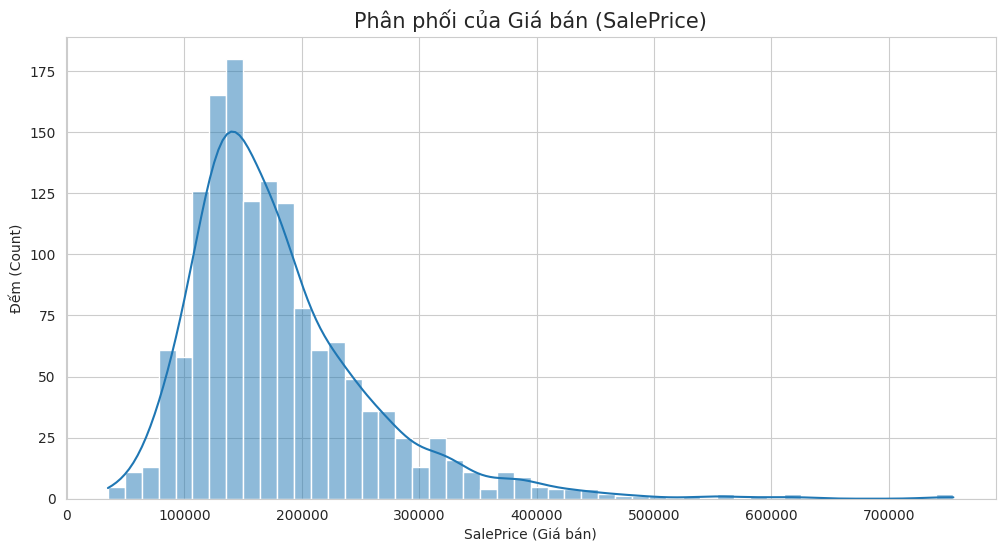

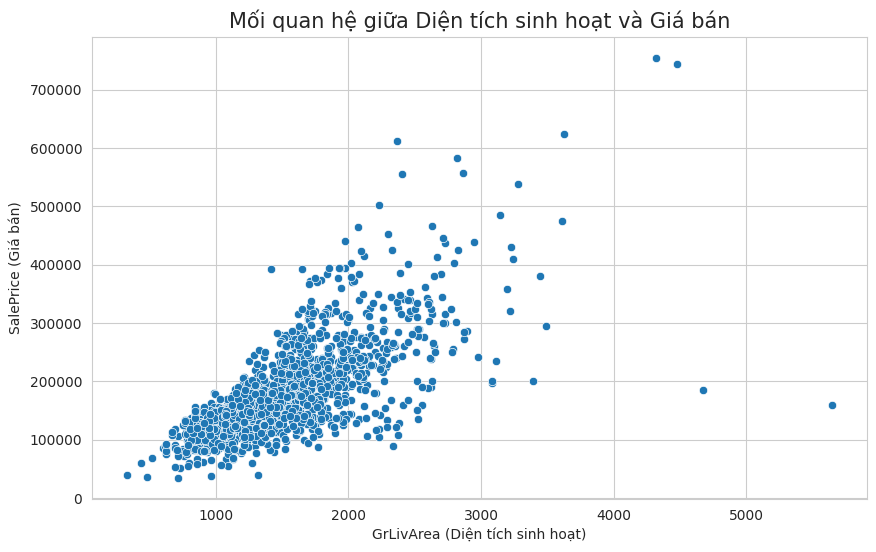

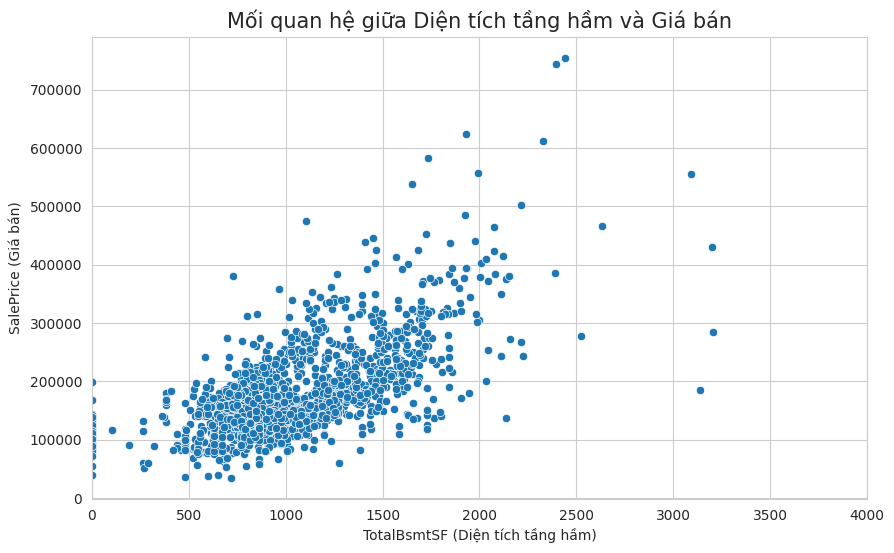

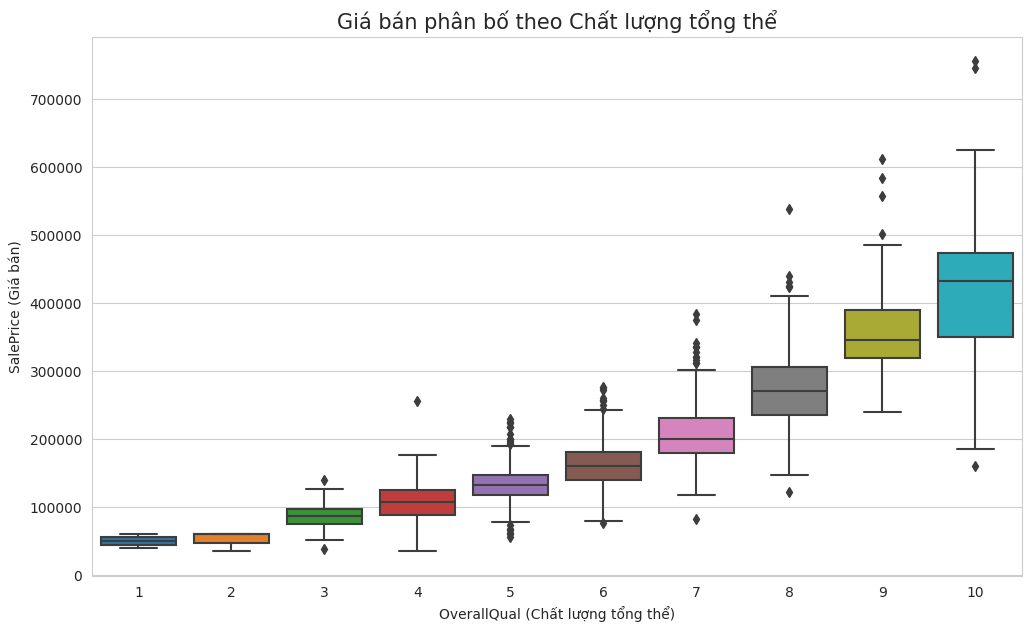

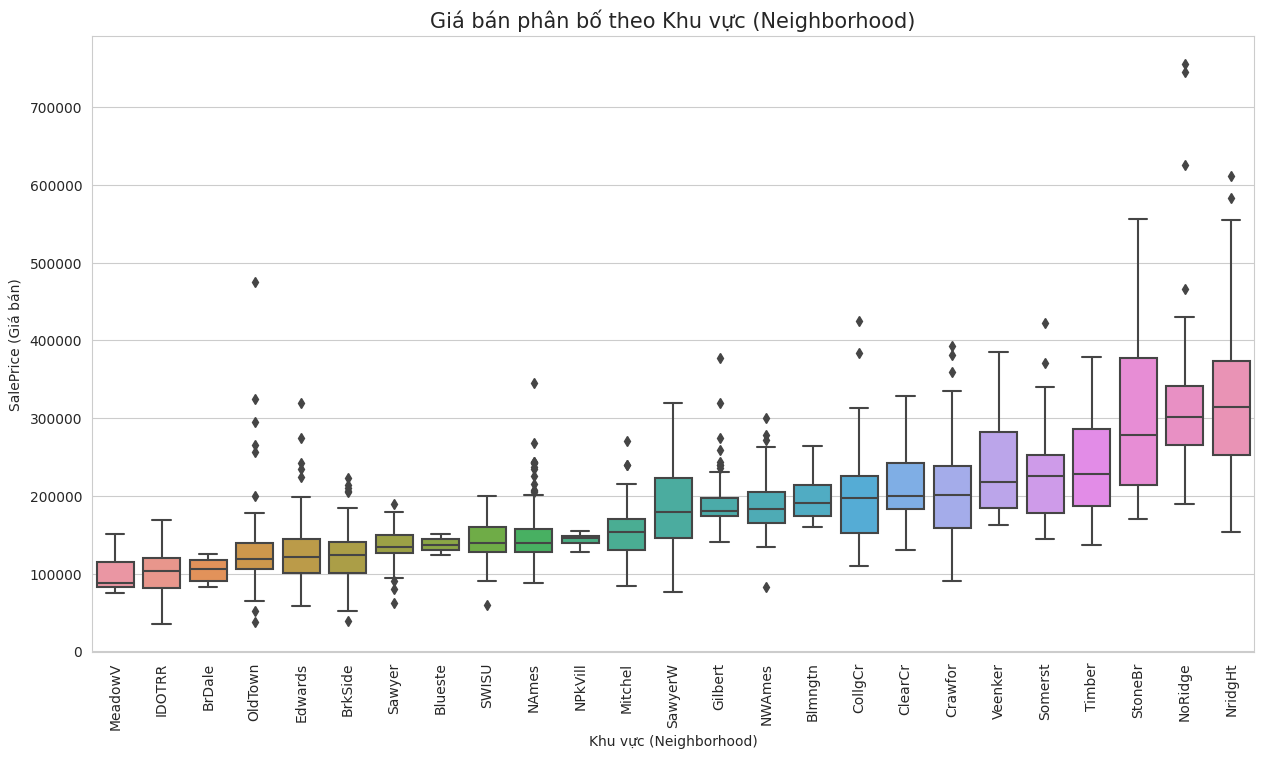

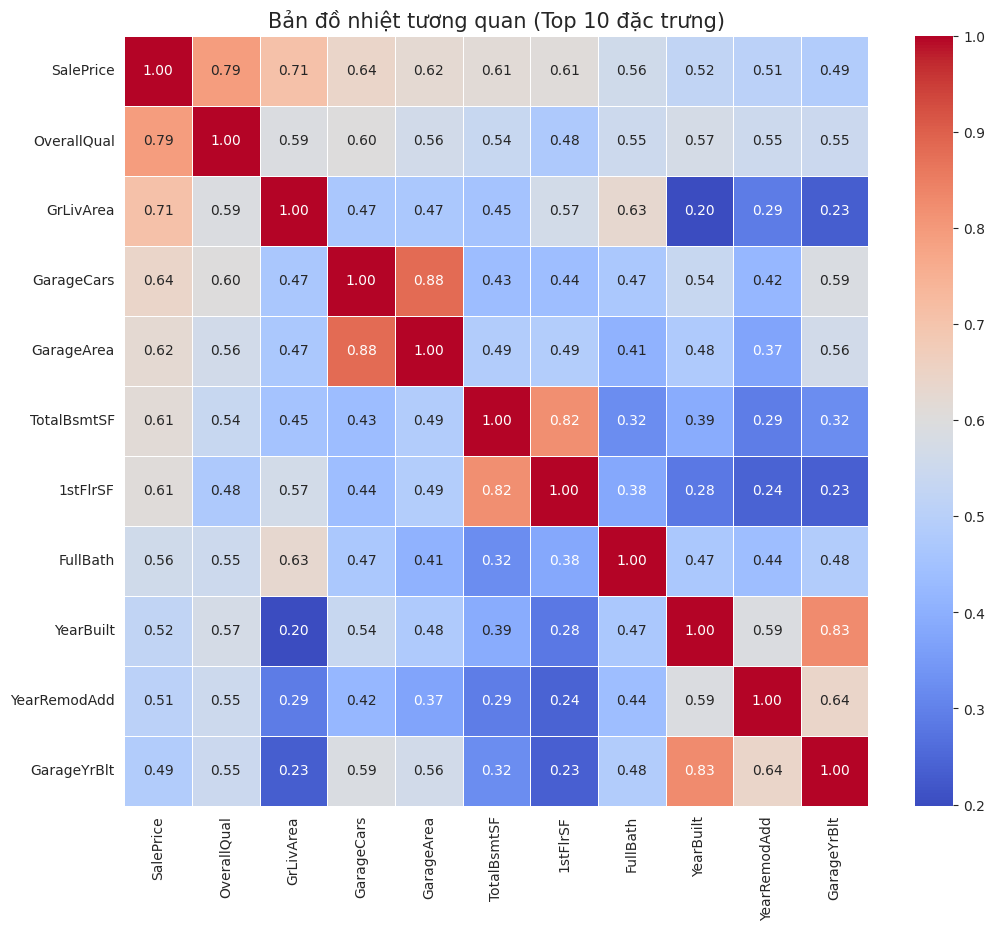

Đã hoàn thành việc vẽ 6 biểu đồ theo thứ tự báo cáo.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

train_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

# 1. Phân phối của Biến mục tiêu (SalePrice)
plt.figure(figsize=(12, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=50)
plt.title('Phân phối của Giá bán (SalePrice)', fontsize=15)
plt.xlabel('SalePrice (Giá bán)')
plt.ylabel('Đếm (Count)')
plt.show()

# 2. Mối quan hệ giữa Diện tích sinh hoạt và Giá bán
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])
plt.title('Mối quan hệ giữa Diện tích sinh hoạt và Giá bán', fontsize=15)
plt.xlabel('GrLivArea (Diện tích sinh hoạt)')
plt.ylabel('SalePrice (Giá bán)')
plt.show()

# 3. Mối quan hệ giữa Diện tích tầng hầm và Giá bán
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df['TotalBsmtSF'], y=train_df['SalePrice'])
plt.title('Mối quan hệ giữa Diện tích tầng hầm và Giá bán', fontsize=15)
plt.xlabel('TotalBsmtSF (Diện tích tầng hầm)')
plt.ylabel('SalePrice (Giá bán)')
plt.xlim(0, 4000)
plt.show()

# 4. Ảnh hưởng của Chất lượng tổng thể đến Giá bán
plt.figure(figsize=(12, 7))
sns.boxplot(x=train_df['OverallQual'], y=train_df['SalePrice'])
plt.title('Giá bán phân bố theo Chất lượng tổng thể', fontsize=15)
plt.xlabel('OverallQual (Chất lượng tổng thể)')
plt.ylabel('SalePrice (Giá bán)')
plt.show()

# 5. Ảnh hưởng của Vị trí (Khu vực) đến Giá bán
plt.figure(figsize=(15, 8))
neighborhood_order = train_df.groupby('Neighborhood')['SalePrice'].median().sort_values().index
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df, order=neighborhood_order)
plt.title('Giá bán phân bố theo Khu vực (Neighborhood)', fontsize=15)
plt.xlabel('Khu vực (Neighborhood)')
plt.ylabel('SalePrice (Giá bán)')
plt.xticks(rotation=90)
plt.show()

# 6. Bản đồ nhiệt các đặc trưng tương quan cao nhất
top_cols_count = 10
top_corr_features = [
    'SalePrice',
    'OverallQual',
    'GrLivArea',
    'GarageCars',
    'GarageArea',
    'TotalBsmtSF',
    '1stFlrSF',
    'FullBath',
    'YearBuilt',
    'YearRemodAdd',
    'GarageYrBlt'
]
top_corr_matrix = train_df[top_corr_features].corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, 
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            linewidths=.5)
plt.title(f'Bản đồ nhiệt tương quan (Top {top_cols_count} đặc trưng)', fontsize=15)
plt.show()

print("Đã hoàn thành việc vẽ 6 biểu đồ theo thứ tự báo cáo.")

## 1.3. Dealing with Missing Values

In [8]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(all_data)

,Total,Percent
PoolQC,2909,99.66
MiscFeature,2814,96.40
Alley,2721,93.22
Fence,2348,80.44
MasVnrType,1766,60.50
FireplaceQu,1420,48.65
LotFrontage,486,16.65
GarageQual,159,5.45
GarageCond,159,5.45
GarageYrBlt,159,5.45


In [9]:
## Some missing values are intentionally left blank, for example: In the Alley feature 
## there are blank values meaning that there are no alley's in that specific house. 
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

In [10]:
## In the following features the null values are there for a purpose, so we replace them with "0"
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)

In [11]:
## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

In [12]:
## Zoning class are given in numerical; therefore converted to categorical variables.
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [13]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [14]:
all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 

In [15]:
# missing_percentage(all_data)
print(all_data.isnull().sum().sum())

0


## 1.4. Dealing wrong formats

In [16]:
# Some numerical features are actually really categories
all_data = all_data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                             50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                             80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                             150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                             "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                         7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                            })
## Important years and months that should be categorical variables not numerical.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 

In [17]:
# Encode some categorical features as ordered numbers when there is information in the order
all_data = all_data.replace({
    "Alley" : {"Grvl" : 1, "Pave" : 2},
    "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
    "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                      "ALQ" : 5, "GLQ" : 6},
    "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                      "ALQ" : 5, "GLQ" : 6},
    "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
    "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
    "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
    "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "FunctioNonel" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                    "Min2" : 6, "Min1" : 7, "Typ" : 8},
    "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
    "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
    "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
    "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
    "Street" : {"Grvl" : 1, "Pave" : 2},
    "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}
})

## 1.5. Fixing Skewness

In [18]:
# def plotting_3_chart(df, feature):
#     ## Importing seaborn, matplotlab and scipy modules. 
#     import seaborn as sns
#     import matplotlib.pyplot as plt
#     import matplotlib.gridspec as gridspec
#     from scipy import stats
#     import matplotlib.style as style
#     style.use('fivethirtyeight')

#     ## Creating a customized chart. and giving in figsize and everything. 
#     fig = plt.figure(constrained_layout=True, figsize=(12,8))
#     ## creating a grid of 3 cols and 3 rows. 
#     grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
#     #gs = fig3.add_gridspec(3, 3)

#     ## Customizing the histogram grid. 
#     ax1 = fig.add_subplot(grid[0, :2])
#     ## Set the title. 
#     ax1.set_title('Histogram')
#     ## plot the histogram. 
#     sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

#     # customizing the QQ_plot. 
#     ax2 = fig.add_subplot(grid[1, :2])
#     ## Set the title. 
#     ax2.set_title('QQ_plot')
#     ## Plotting the QQ_Plot. 
#     stats.probplot(df.loc[:,feature], plot = ax2)

#     ## Customizing the Box Plot. 
#     ax3 = fig.add_subplot(grid[:, 2])
#     ## Set title. 
#     ax3.set_title('Box Plot')
#     ## Plotting the box plot. 
#     sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
# plotting_3_chart(train, 'SalePrice')

In [19]:
# print("Skewness: " + str(train['SalePrice'].skew()))

In [20]:
# ## trainsforming target variable using numpy.log1p, 
# train["SalePrice"] = np.log1p(train["SalePrice"])

# ## Plotting the newly transformed response variable
# plotting_3_chart(train, 'SalePrice')

In [21]:
# numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

# skewed_feats

In [22]:
# sns.distplot(all_data['1stFlrSF']);

In [23]:
def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    using Yeo-Johnson transformation.
    """
    ## Import necessary modules
    from scipy.stats import skew
    # Use yeojohnson and yeojohnson_normmax
    from scipy.stats import yeojohnson, yeojohnson_normmax
    
    ## Getting all the data that are not of "object" type.
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    print(f"Found {len(skewed_features)} skewed features to transform.")

    for feat in skewed_features:
        try:
            # Find the optimal lambda using yeojohnson_normmax
            # Note: We pass the original data (df[feat]), no +1 is needed
            lmbda = yeojohnson_normmax(df[feat])
            
            # Apply the Yeo-Johnson transformation
            df[feat] = yeojohnson(df[feat], lmbda)
            
        except Exception as e:
            # Catch rare errors (e.g., a column with all identical values)
            print(f"Could not transform {feat}: {e}")
            
    return df

# How to call the function:
all_data = fixing_skewness(all_data)

Found 41 skewed features to transform.


In [24]:
# sns.distplot(all_data['1stFlrSF']);

## 1.6. Creating New Features
We will create new features, in 3 ways :
1. Simplifications of existing features
2. Combinations of existing features
3. Polynomials on the top 10 existing features

In [25]:
# # 1. Simplifications of existing features
# all_data["SimplOverallQual"] = all_data.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
#                                                        4 : 2, 5 : 2, 6 : 2, # average
#                                                        7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
#                                                       })
# all_data["SimplOverallCond"] = all_data.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
#                                                        4 : 2, 5 : 2, 6 : 2, # average
#                                                        7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
#                                                       })
# all_data["SimplPoolQC"] = all_data.PoolQC.replace({1 : 1, 2 : 1, # average
#                                              3 : 2, 4 : 2 # good
#                                             })
# all_data["SimplGarageCond"] = all_data.GarageCond.replace({1 : 1, # bad
#                                                      2 : 1, 3 : 1, # average
#                                                      4 : 2, 5 : 2 # good
#                                                     })
# all_data["SimplGarageQual"] = all_data.GarageQual.replace({1 : 1, # bad
#                                                      2 : 1, 3 : 1, # average
#                                                      4 : 2, 5 : 2 # good
#                                                     })
# all_data["SimplFireplaceQu"] = all_data.FireplaceQu.replace({1 : 1, # bad
#                                                        2 : 1, 3 : 1, # average
#                                                        4 : 2, 5 : 2 # good
#                                                       })
# all_data["SimplFireplaceQu"] = all_data.FireplaceQu.replace({1 : 1, # bad
#                                                        2 : 1, 3 : 1, # average
#                                                        4 : 2, 5 : 2 # good
#                                                       })
# all_data["SimplFunctional"] = all_data.Functional.replace({1 : 1, 2 : 1, # bad
#                                                      3 : 2, 4 : 2, # major
#                                                      5 : 3, 6 : 3, 7 : 3, # minor
#                                                      8 : 4 # typical
#                                                     })
# all_data["SimplKitchenQual"] = all_data.KitchenQual.replace({1 : 1, # bad
#                                                        2 : 1, 3 : 1, # average
#                                                        4 : 2, 5 : 2 # good
#                                                       })
# all_data["SimplHeatingQC"] = all_data.HeatingQC.replace({1 : 1, # bad
#                                                    2 : 1, 3 : 1, # average
#                                                    4 : 2, 5 : 2 # good
#                                                   })
# all_data["SimplBsmtFinType1"] = all_data.BsmtFinType1.replace({1 : 1, # unfinished
#                                                          2 : 1, 3 : 1, # rec room
#                                                          4 : 2, 5 : 2, 6 : 2 # living quarters
#                                                         })
# all_data["SimplBsmtFinType2"] = all_data.BsmtFinType2.replace({1 : 1, # unfinished
#                                                          2 : 1, 3 : 1, # rec room
#                                                          4 : 2, 5 : 2, 6 : 2 # living quarters
#                                                         })
# all_data["SimplBsmtCond"] = all_data.BsmtCond.replace({1 : 1, # bad
#                                                  2 : 1, 3 : 1, # average
#                                                  4 : 2, 5 : 2 # good
#                                                 })
# all_data["SimplBsmtQual"] = all_data.BsmtQual.replace({1 : 1, # bad
#                                                  2 : 1, 3 : 1, # average
#                                                  4 : 2, 5 : 2 # good
#                                                 })
# all_data["SimplExterCond"] = all_data.ExterCond.replace({1 : 1, # bad
#                                                    2 : 1, 3 : 1, # average
#                                                    4 : 2, 5 : 2 # good
#                                                   })
# all_data["SimplExterQual"] = all_data.ExterQual.replace({1 : 1, # bad
#                                                    2 : 1, 3 : 1, # average
#                                                    4 : 2, 5 : 2 # good
#                                                   })
# all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
# all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [26]:
# # 2. Combinations of existing features
# # Overall quality of the house
# all_data["OverallGrade"] = all_data["OverallQual"] * all_data["OverallCond"]
# # Overall quality of the garage
# all_data["GarageGrade"] = all_data["GarageQual"] * all_data["GarageCond"]
# # Overall quality of the exterior
# all_data["ExterGrade"] = all_data["ExterQual"] * all_data["ExterCond"]
# # Overall kitchen score
# all_data["KitchenScore"] = all_data["KitchenAbvGr"] * all_data["KitchenQual"]
# # Overall fireplace score
# all_data["FireplaceScore"] = all_data["Fireplaces"] * all_data["FireplaceQu"]
# # Overall garage score
# all_data["GarageScore"] = all_data["GarageArea"] * all_data["GarageQual"]
# # Overall pool score
# all_data["PoolScore"] = all_data["PoolArea"] * all_data["PoolQC"]
# # Simplified overall quality of the house
# all_data["SimplOverallGrade"] = all_data["SimplOverallQual"] * all_data["SimplOverallCond"]
# # Simplified overall quality of the exterior
# all_data["SimplExterGrade"] = all_data["SimplExterQual"] * all_data["SimplExterCond"]
# # Simplified overall pool score
# all_data["SimplPoolScore"] = all_data["PoolArea"] * all_data["SimplPoolQC"]
# # Simplified overall garage score
# all_data["SimplGarageScore"] = all_data["GarageArea"] * all_data["SimplGarageQual"]
# # Simplified overall fireplace score
# all_data["SimplFireplaceScore"] = all_data["Fireplaces"] * all_data["SimplFireplaceQu"]
# # Simplified overall kitchen score
# all_data["SimplKitchenScore"] = all_data["KitchenAbvGr"] * all_data["SimplKitchenQual"]
# # Total number of bathrooms
# all_data["TotalBath"] = all_data["BsmtFullBath"] + (0.5 * all_data["BsmtHalfBath"]) + \
# all_data["FullBath"] + (0.5 * all_data["HalfBath"])
# # Total SF for house (incl. basement)
# all_data["AllSF"] = all_data["GrLivArea"] + all_data["TotalBsmtSF"]
# # Total SF for 1st + 2nd floors
# all_data["AllFlrsSF"] = all_data["1stFlrSF"] + all_data["2ndFlrSF"]
# # Total SF for porch
# all_data["AllPorchSF"] = all_data["OpenPorchSF"] + all_data["EnclosedPorch"] + \
# all_data["3SsnPorch"] + all_data["ScreenPorch"]
# # Has masonry veneer or not
# all_data["HasMasVnr"] = all_data.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
#                                                "Stone" : 1, "None" : 0})
# # House completed before sale or not
# all_data["BoughtOffPlan"] = all_data.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
#                                                       "Family" : 0, "Normal" : 0, "Partial" : 1})
# # house age
# all_data['HouseAge'] = all_data['YrSold'].astype(int) - all_data['YearBuilt']
# # remodel age
# all_data['RemodAge'] = all_data['YrSold'].astype(int) - all_data['YearRemodAdd']
# # indicator for recent remodel or new
# all_data['IsNew'] = (all_data['YearBuilt'] == all_data['YrSold']).astype(int)
# all_data['WasRemodeled'] = (all_data['YearRemodAdd'] == all_data['YrSold']).astype(int)

In [27]:
## Getting the correlation of all the features with target variable. 
(train.corr(numeric_only=True)**2)["SalePrice"].sort_values(ascending=False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

In [28]:
# # 3. Polynomials on the top 10 existing features
# all_data["OverallQual-s2"] = all_data["OverallQual"] ** 2
# all_data["OverallQual-s3"] = all_data["OverallQual"] ** 3
# all_data["OverallQual-Sq"] = np.sqrt(all_data["OverallQual"])
# all_data["AllSF-2"] = all_data["AllSF"] ** 2
# all_data["AllSF-3"] = all_data["AllSF"] ** 3
# all_data["AllSF-Sq"] = np.sqrt(all_data["AllSF"])
# all_data["AllFlrsSF-2"] = all_data["AllFlrsSF"] ** 2
# all_data["AllFlrsSF-3"] = all_data["AllFlrsSF"] ** 3
# all_data["AllFlrsSF-Sq"] = np.sqrt(all_data["AllFlrsSF"])
# all_data["GrLivArea-2"] = all_data["GrLivArea"] ** 2
# all_data["GrLivArea-3"] = all_data["GrLivArea"] ** 3
# all_data["GrLivArea-Sq"] = np.sqrt(all_data["GrLivArea"])
# all_data["SimplOverallQual-s2"] = all_data["SimplOverallQual"] ** 2
# all_data["SimplOverallQual-s3"] = all_data["SimplOverallQual"] ** 3
# all_data["SimplOverallQual-Sq"] = np.sqrt(all_data["SimplOverallQual"])
# all_data["ExterQual-2"] = all_data["ExterQual"] ** 2
# all_data["ExterQual-3"] = all_data["ExterQual"] ** 3
# all_data["ExterQual-Sq"] = np.sqrt(all_data["ExterQual"])
# all_data["GarageCars-2"] = all_data["GarageCars"] ** 2
# all_data["GarageCars-3"] = all_data["GarageCars"] ** 3
# all_data["GarageCars-Sq"] = np.sqrt(all_data["GarageCars"])
# all_data["TotalBath-2"] = all_data["TotalBath"] ** 2
# all_data["TotalBath-3"] = all_data["TotalBath"] ** 3
# all_data["TotalBath-Sq"] = np.sqrt(all_data["TotalBath"])
# all_data["KitchenQual-2"] = all_data["KitchenQual"] ** 2
# all_data["KitchenQual-3"] = all_data["KitchenQual"] ** 3
# all_data["KitchenQual-Sq"] = np.sqrt(all_data["KitchenQual"])
# all_data["GarageScore-2"] = all_data["GarageScore"] ** 2
# all_data["GarageScore-3"] = all_data["GarageScore"] ** 3
# all_data["GarageScore-Sq"] = np.sqrt(all_data["GarageScore"])

In [29]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

## 1.7. Creating Dummy Variables

In [30]:
## Creating dummy variable 
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape

(2919, 269)

In [31]:
X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(y):, :]

y = np.log1p(y)

outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

counts = X.BsmtUnfSF.value_counts()

counts.iloc[0]

for i in X.columns:
    counts = X[i].value_counts()
    # print (counts)

## 1.8. overlap_reducer

In [32]:
def overlap_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overlapping.
    """
    overlap = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overlap.append(i)
    overlap = list(overlap)
    return overlap


overlap_features = overlap_reducer(X)

X = X.drop(overlap_features, axis=1)
X_sub = X_sub.drop(overlap_features, axis=1)

# 2. Models

In [33]:
# 1. Chuẩn hóa dữ liệu (Scaling)
print("--- 1. CHUẨN BỊ DỮ LIỆU ---")
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_sub_scaled = scaler.transform(X_sub)
print(f"Đã chuẩn hóa dữ liệu. X_scaled shape: {X_scaled.shape}")

# 2. Thiết lập Cross-Validation
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)
print("Đã thiết lập 10-Fold Cross-Validation.\n")

--- 1. CHUẨN BỊ DỮ LIỆU ---
Đã chuẩn hóa dữ liệu. X_scaled shape: (1455, 268)
Đã thiết lập 10-Fold Cross-Validation.



In [34]:
from sklearn.linear_model import LassoCV

print("--- 2. BẮT ĐẦU VỚI LASSO (L1) ---")

# 2.1. Định nghĩa mô hình
# Cung cấp một danh sách các alpha (tham số điều chuẩn) để mô hình thử
alphas_lasso = [1e-4, 0.001, 0.005, 0.01]

lasso_model = LassoCV(alphas=alphas_lasso, 
                      max_iter=50000, 
                      cv=k_folds, 
                      random_state=42,
                      n_jobs=-1) # Dùng tất cả CPU

# 2.2. Đánh giá
print("Đang đánh giá LassoCV với 10-folds (có thể mất vài phút)...")
# 'neg_root_mean_squared_error' là RMSE, kết quả là số âm
lasso_score = cross_val_score(lasso_model, X_scaled, y, 
                              scoring='neg_root_mean_squared_error', 
                              cv=k_folds, 
                              n_jobs=-1)

# Lấy trị tuyệt đối để có RMSE
print(f"  RMSE (trung bình 10-folds): {-lasso_score.mean():.6f}")
print(f"  Độ lệch chuẩn (std): {lasso_score.std():.6f}")

# 2.3. Huấn luyện
print("Đang huấn luyện LassoCV trên toàn bộ dữ liệu (để tìm alpha tốt nhất)...")
lasso_model.fit(X_scaled, y)
print(f"  Lasso đã chọn alpha tốt nhất là: {lasso_model.alpha_}")

# 2.4. Phân tích
# Xem Lasso đã loại bỏ bao nhiêu đặc trưng
coefs_lasso = pd.Series(lasso_model.coef_, index=X.columns)
print(f"  Lasso đã loại bỏ {sum(coefs_lasso == 0)} trên tổng số {len(coefs_lasso)} đặc trưng.")
print("--- Hoàn tất Lasso ---\n")

--- 2. BẮT ĐẦU VỚI LASSO (L1) ---
Đang đánh giá LassoCV với 10-folds (có thể mất vài phút)...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+01, tolerance: 2.060e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+01, tolerance: 2.063e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+01, tolerance: 2.037e

  RMSE (trung bình 10-folds): 0.121788
  Độ lệch chuẩn (std): 0.038904
Đang huấn luyện LassoCV trên toàn bộ dữ liệu (để tìm alpha tốt nhất)...
  Lasso đã chọn alpha tốt nhất là: 0.001
  Lasso đã loại bỏ 199 trên tổng số 268 đặc trưng.
--- Hoàn tất Lasso ---



In [35]:
# (Code của bạn đã có)
coefs_lasso = pd.Series(lasso_model.coef_, index=X.columns)

# 1. Lọc ra 92 đặc trưng đã được giữ lại (trọng số khác 0)
kept_features = coefs_lasso[coefs_lasso != 0]

# 2. Sắp xếp chúng để xem
sorted_features = kept_features.sort_values(ascending=False)

# 3. In ra top 10 TÍCH CỰC (đẩy giá lên)
print("\n--- Top 10 đặc trưng làm TĂNG giá nhà (Lasso) ---")
print(sorted_features.head(10))

# 4. In ra top 10 TIÊU CỰC (kéo giá xuống)
print("\n--- Top 10 đặc trưng làm GIẢM giá nhà (Lasso) ---")
print(sorted_features.tail(10))


--- Top 10 đặc trưng làm TĂNG giá nhà (Lasso) ---
GrLivArea               0.167475
OverallQual             0.110099
Neighborhood_StoneBr    0.079036
Neighborhood_NridgHt    0.078454
YearBuilt               0.077546
Neighborhood_Crawfor    0.075016
Neighborhood_NoRidge    0.069988
Exterior1st_BrkFace     0.062995
BsmtFinSF1              0.057903
Functional_Typ          0.057625
dtype: float64

--- Top 10 đặc trưng làm GIẢM giá nhà (Lasso) ---
MoSold_Oct              -0.008162
Neighborhood_OldTown    -0.008860
BsmtExposure_No         -0.014634
MSSubClass_SC160        -0.020287
CentralAir_N            -0.025732
LandContour_Bnk         -0.025944
MSZoning_RM             -0.043804
Neighborhood_Edwards    -0.046864
SaleCondition_Abnorml   -0.057269
MSZoning_C (all)        -0.172801
dtype: float64


In [36]:
from sklearn.linear_model import RidgeCV

print("--- 3. TIẾP TỤC VỚI RIDGE (L2) ---")

# 3.1. Định nghĩa mô hình
alphas_ridge = [1e-4, 0.001, 0.005, 0.01]
ridge_model = RidgeCV(alphas=alphas_ridge, cv=k_folds)

# 3.2. Đánh giá
print("Đang đánh giá RidgeCV với 10-folds...")
ridge_score = cross_val_score(ridge_model, X_scaled, y, 
                              scoring='neg_root_mean_squared_error', 
                              cv=k_folds, 
                              n_jobs=-1)

print(f"  RMSE (trung bình 10-folds): {-ridge_score.mean():.6f}")
print(f"  Độ lệch chuẩn (std): {ridge_score.std():.6f}")

# 3.3. Huấn luyện
print("Đang huấn luyện RidgeCV trên toàn bộ dữ liệu...")
ridge_model.fit(X_scaled, y)
print(f"  Ridge đã chọn alpha tốt nhất là: {ridge_model.alpha_}")
print("--- Hoàn tất Ridge ---\n")

--- 3. TIẾP TỤC VỚI RIDGE (L2) ---
Đang đánh giá RidgeCV với 10-folds...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.27778e-77): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.14192e-77): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.3376e-77): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.06738e-77): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

  RMSE (trung bình 10-folds): 0.131615
  Độ lệch chuẩn (std): 0.035006
Đang huấn luyện RidgeCV trên toàn bộ dữ liệu...
  Ridge đã chọn alpha tốt nhất là: 0.01
--- Hoàn tất Ridge ---



In [37]:
# 1. Lấy tất cả trọng số (sẽ không có số 0 nào)
coefs_ridge = pd.Series(ridge_model.coef_, index=X.columns)

# 2. Sắp xếp chúng
sorted_features_ridge = coefs_ridge.sort_values(ascending=False)

# 3. In ra top 10 TÍCH CỰC (đẩy giá lên)
print("\n--- Top 10 đặc trưng làm Tăng giá nhà (Ridge) ---")
print(sorted_features_ridge.head(10))

# 4. In ra top 10 TIÊU CỰC (kéo giá xuống)
print("\n--- Top 10 đặc trưng Giảm giá nhà (Ridge) ---")
print(sorted_features_ridge.tail(10))


--- Top 10 đặc trưng làm Tăng giá nhà (Ridge) ---
PoolArea            1.662095
3SsnPorch           0.392945
RoofMatl_Membran    0.361690
RoofMatl_WdShngl    0.347585
Condition2_PosA     0.342605
RoofMatl_Metal      0.246895
RoofMatl_CompShg    0.207885
RoofMatl_Tar&Grv    0.192273
BsmtHalfBath        0.190105
RoofMatl_WdShake    0.175112
dtype: float64

--- Top 10 đặc trưng Giảm giá nhà (Ridge) ---
Exterior2nd_Other     -0.147739
Condition2_RRAe       -0.170771
KitchenAbvGr          -0.197237
Functional_Sev        -0.219363
Exterior1st_BrkComm   -0.260022
MSZoning_C (all)      -0.333896
LowQualFinSF          -0.415715
Condition2_PosN       -0.581536
MiscVal               -0.775955
RoofMatl_ClyTile      -1.663752
dtype: float64


In [38]:
from sklearn.linear_model import ElasticNetCV

print("--- 4. CUỐI CÙNG LÀ ELASTICNET (L1 + L2) ---")

# 4.1. Định nghĩa mô hình
alphas_elastic = [0.001, 0.005]
# l1_ratio = 1 nghĩa là Lasso, l1_ratio = 0 nghĩa là Ridge
l1_ratios_elastic = [0.1, 0.5, 1]

elastic_model = ElasticNetCV(alphas=alphas_elastic, 
                             l1_ratio=l1_ratios_elastic, 
                             max_iter=3000, 
                             cv=k_folds, 
                             random_state=42,
                             n_jobs=-1)

# 4.2. Đánh giá
print("Đang đánh giá ElasticNetCV với 10-folds (có thể mất vài phút)...")
elastic_score = cross_val_score(elastic_model, X_scaled, y, 
                                scoring='neg_root_mean_squared_error', 
                                cv=k_folds, 
                                n_jobs=-1)

print(f"  RMSE (trung bình 10-folds): {-elastic_score.mean():.6f}")
print(f"  Độ lệch chuẩn (std): {elastic_score.std():.6f}")

# 4.3. Huấn luyện
print("Đang huấn luyện ElasticNetCV trên toàn bộ dữ liệu...")
elastic_model.fit(X_scaled, y)
print(f"  ElasticNet đã chọn alpha: {elastic_model.alpha_}")
print(f"  ElasticNet đã chọn l1_ratio: {elastic_model.l1_ratio_}")
print("--- Hoàn tất ElasticNet ---\n")

--- 4. CUỐI CÙNG LÀ ELASTICNET (L1 + L2) ---
Đang đánh giá ElasticNetCV với 10-folds (có thể mất vài phút)...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.313e+00, tolerance: 2.063e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.522e+00, tolerance: 2.100e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.690e+00, tolerance: 2.060e

  RMSE (trung bình 10-folds): 0.119080
  Độ lệch chuẩn (std): 0.038372
Đang huấn luyện ElasticNetCV trên toàn bộ dữ liệu...
  ElasticNet đã chọn alpha: 0.001
  ElasticNet đã chọn l1_ratio: 0.5
--- Hoàn tất ElasticNet ---



In [39]:
try:
    coefs_elastic = pd.Series(elastic_model.coef_, index=X.columns)

    # 2. Sắp xếp các trọng số
    sorted_features_elastic = coefs_elastic.sort_values(ascending=False)

    # 3. In ra top 10 TÍCH CỰC
    print("\n--- Top 10 đặc trưng làm Tăng giá nhà (ElasticNet) ---")
    print(sorted_features_elastic.head(10))

    # 4. In ra top 10 TIÊU CỰC
    print("\n--- Top 10 đặc trưng Giảm giá nhà (ElasticNet) ---")
    print(sorted_features_elastic.tail(10))

    # 5. In ra số lượng đặc trưng bị loại bỏ
    # Vì ElasticNet có thành phần L1, nó cũng có thể loại bỏ đặc trưng
    print(f"\n  ElasticNet đã loại bỏ {sum(coefs_elastic == 0)} trên tổng số {len(coefs_elastic)} đặc trưng.")

except NameError:
    print("\nLỗi: Không tìm thấy biến 'X'. Hãy chắc chắn 'X' đã được định nghĩa để lấy tên cột.")
except Exception as e:
    print(f"\nĐã xảy ra lỗi khi lấy trọng số: {e}")


--- Top 10 đặc trưng làm Tăng giá nhà (ElasticNet) ---
GrLivArea               0.159389
Neighborhood_StoneBr    0.114817
OverallQual             0.103233
Neighborhood_NridgHt    0.095481
Neighborhood_NoRidge    0.092372
Neighborhood_Crawfor    0.090947
YearBuilt               0.075526
Exterior1st_BrkFace     0.074694
Functional_Typ          0.066637
ScreenPorch             0.053791
dtype: float64

--- Top 10 đặc trưng Giảm giá nhà (ElasticNet) ---
Neighborhood_OldTown    -0.017380
CentralAir_N            -0.018300
LandContour_Bnk         -0.026876
MSZoning_RM             -0.038796
MSSubClass_SC160        -0.039600
Neighborhood_Edwards    -0.050969
SaleCondition_Abnorml   -0.053365
Condition2_PosN         -0.098014
MSZoning_C (all)        -0.241998
RoofMatl_ClyTile        -0.360722
dtype: float64

  ElasticNet đã loại bỏ 161 trên tổng số 268 đặc trưng.


In [40]:
import pandas as pd
import numpy as np

print("--- 5. TẠO FILE SUBMISSION TỪ CÁC MÔ HÌNH TUYẾN TÍNH ---")

# Giả định các biến sau đã tồn tại trong môi trường:
# 1. lasso_model (đã .fit())
# 2. ridge_model (đã .fit())
# 3. elastic_model (đã .fit())
# 4. X_sub_scaled (dữ liệu test đã được RobustScaler transform)

# 1. Tải lại file test.csv gốc để lấy cột 'Id'
try:
    # (Đảm bảo file 'test.csv' có trong thư mục của bạn)
    test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
    test_ids = test_df['Id']
    print(f"Đã tải {len(test_ids)} Ids từ file test.csv.")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'test.csv'.")
    # Tạo Id giả lập nếu không tìm thấy file
    try:
        num_test_rows = X_sub_scaled.shape[0]
        test_ids = pd.Series(range(1461, 1461 + num_test_rows))
        print(f"Đã tạo {num_test_rows} Ids giả lập.")
    except NameError:
        print("Lỗi: Không tìm thấy X_sub_scaled. Không thể xác định số hàng test.")
        test_ids = None
except Exception as e:
    print(f"Lỗi khi tải test.csv: {e}")
    test_ids = None

if test_ids is not None:
    # 2. Tạo dự đoán
    print("Đang tạo dự đoán...")
    
    try:
        # Lấy dự đoán trên thang đo log
        predictions_lasso_log = lasso_model.predict(X_sub_scaled)
        predictions_ridge_log = ridge_model.predict(X_sub_scaled)
        predictions_elastic_log = elastic_model.predict(X_sub_scaled)
        
        print("Đã có dự đoán từ 3 mô hình.")

    except NameError as ne:
        print(f"Lỗi: Một biến cần thiết không tồn tại: {ne}")
        print("Hãy chắc chắn rằng bạn đã chạy các ô code huấn luyện mô hình (lasso_model, ridge_model, elastic_model) và chuẩn hóa (X_sub_scaled) trước đó.")
        predictions_lasso_log = None # Đặt là None để không chạy tiếp
    except Exception as e:
         print(f"Lỗi trong quá trình dự đoán: {e}")
         predictions_lasso_log = None # Đặt là None để không chạy tiếp

    if predictions_lasso_log is not None:
        # 3. Đảo ngược phép biến đổi log (QUAN TRỌNG)
        # Chúng ta đã dự đoán log(SalePrice + 1)
        # Cần đảo ngược về SalePrice bằng exp(prediction) - 1
        predictions_lasso = np.expm1(predictions_lasso_log)
        predictions_ridge = np.expm1(predictions_ridge_log)
        predictions_elastic = np.expm1(predictions_elastic_log)
        print("Đã đảo ngược phép biến đổi log (np.expm1).")

        # 4. Tạo DataFrame cho submission
        submission_lasso = pd.DataFrame({
            'Id': test_ids,
            'SalePrice': predictions_lasso
        })
        
        submission_ridge = pd.DataFrame({
            'Id': test_ids,
            'SalePrice': predictions_ridge
        })
        
        submission_elastic = pd.DataFrame({
            'Id': test_ids,
            'SalePrice': predictions_elastic
        })

        # 5. Lưu file CSV
        submission_lasso.to_csv("submission_lasso.csv", index=False)
        submission_ridge.to_csv("submission_ridge.csv", index=False)
        submission_elastic.to_csv("submission_elastic.csv", index=False)

        print("\n--- ĐÃ XUẤT FILE CSV ---")
        print("Bạn có thể tải các file sau để nộp lên Kaggle:")
        print("1. submission_lasso.csv")
        print("2. submission_ridge.csv")
        print("3. submission_elastic.csv")
        
        print("\nXem trước 5 dòng đầu của file Lasso (submission_lasso.csv):")
        print(submission_lasso.head())
    else:
        print("Không thể tạo file submission do lỗi ở bước dự đoán.")
else:
    print("Không thể tạo file submission vì không tải được 'Id' từ 'test.csv'.")

--- 5. TẠO FILE SUBMISSION TỪ CÁC MÔ HÌNH TUYẾN TÍNH ---
Đã tải 1459 Ids từ file test.csv.
Đang tạo dự đoán...
Đã có dự đoán từ 3 mô hình.
Đã đảo ngược phép biến đổi log (np.expm1).

--- ĐÃ XUẤT FILE CSV ---
Bạn có thể tải các file sau để nộp lên Kaggle:
1. submission_lasso.csv
2. submission_ridge.csv
3. submission_elastic.csv

Xem trước 5 dòng đầu của file Lasso (submission_lasso.csv):
     Id      SalePrice
0  1461  112543.791454
1  1462  159397.422896
2  1463  180188.373958
3  1464  196296.490327
4  1465  193880.108338
